In [2]:
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import os
import joblib
from umap import UMAP

from visualizations_compression import compare_dimensionality_reduction, load_grayscale_image, decompose_svd, plot_svd_analysis

# data load

In [4]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist['data']
y = mnist['target'].astype(np.int64)

In [7]:
X.shape

(70000, 784)

# Visualizations (№3)

--- Обработка метода: PCA ---


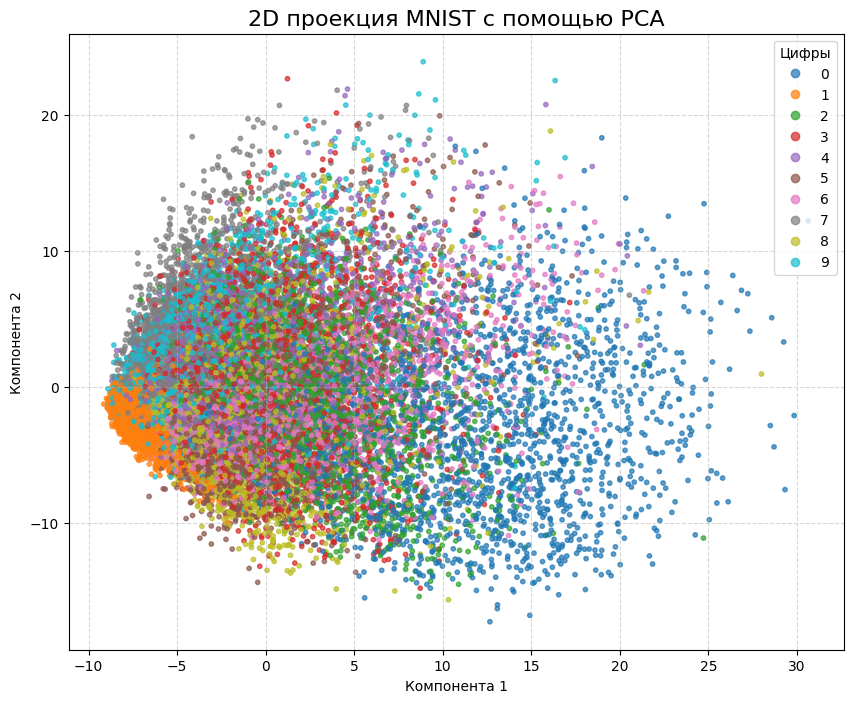

Метрика качества разделения для 'PCA' (k-NN Accuracy):
  Точность на Train: 0.4534
  Точность на Test:  0.3340

--- Обработка метода: SVD ---


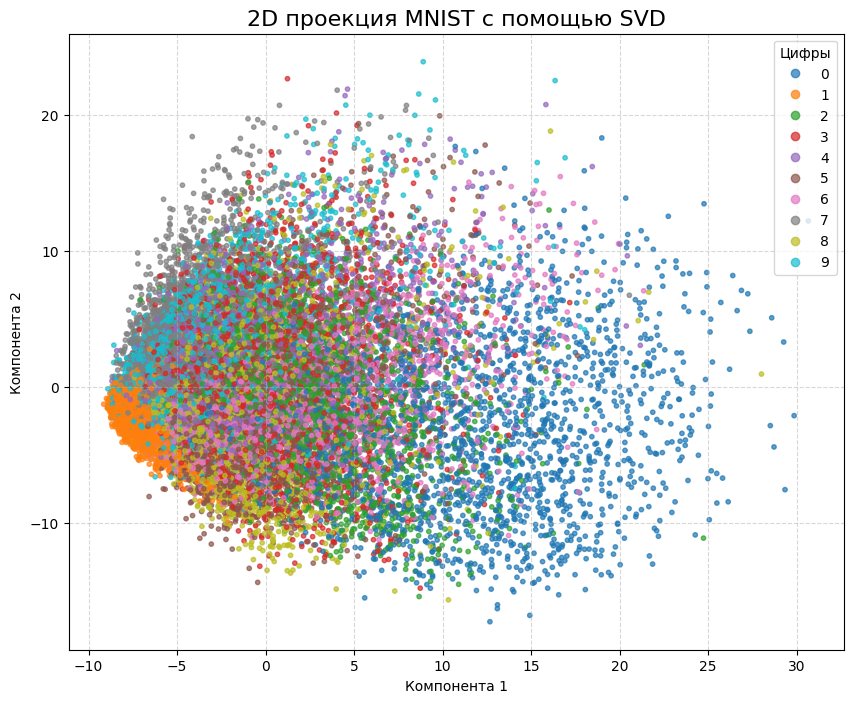

Метрика качества разделения для 'SVD' (k-NN Accuracy):
  Точность на Train: 0.4533
  Точность на Test:  0.3339

--- Обработка метода: Randomized-SVD ---


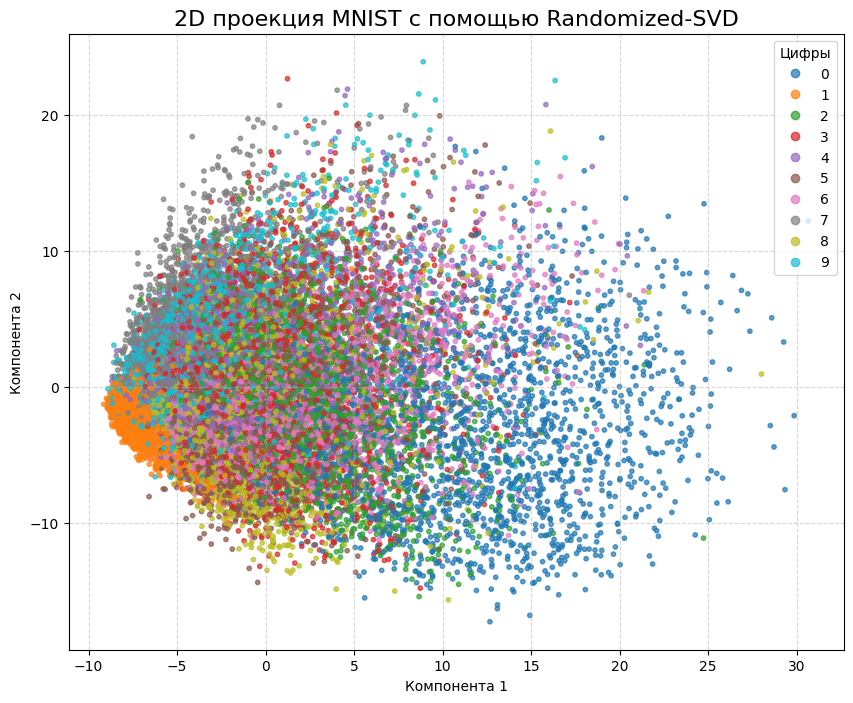

Метрика качества разделения для 'Randomized-SVD' (k-NN Accuracy):
  Точность на Train: 0.4533
  Точность на Test:  0.3339

--- Обработка метода: TSNE ---


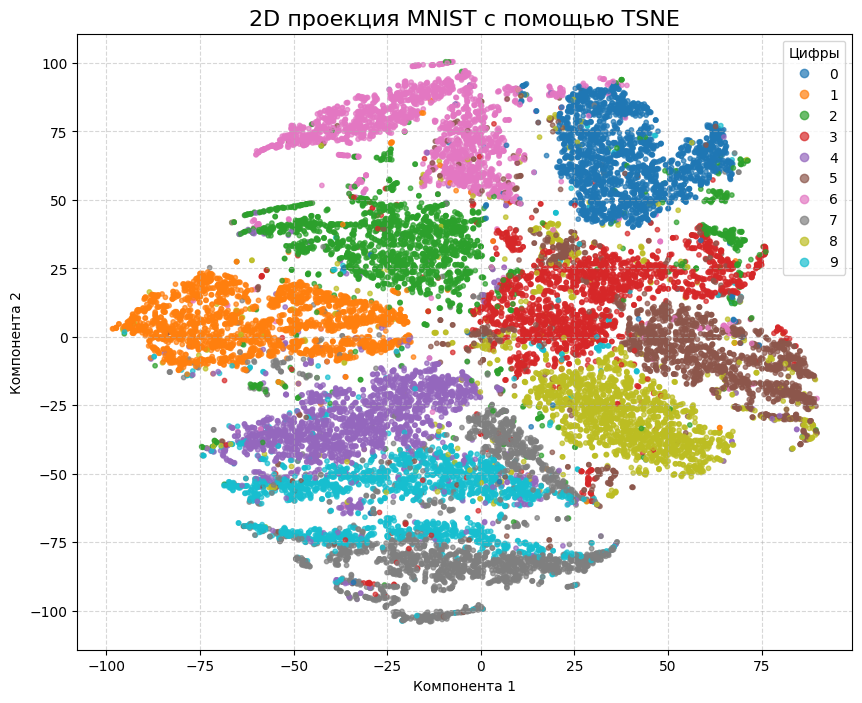

Метрика качества разделения для 'TSNE' (k-NN Accuracy):
  Точность на Train: 0.9383
  Точность на Test:  0.0951

--- Обработка метода: UMAP ---


/home/alagis/S21/ML_projects/.ml4_env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


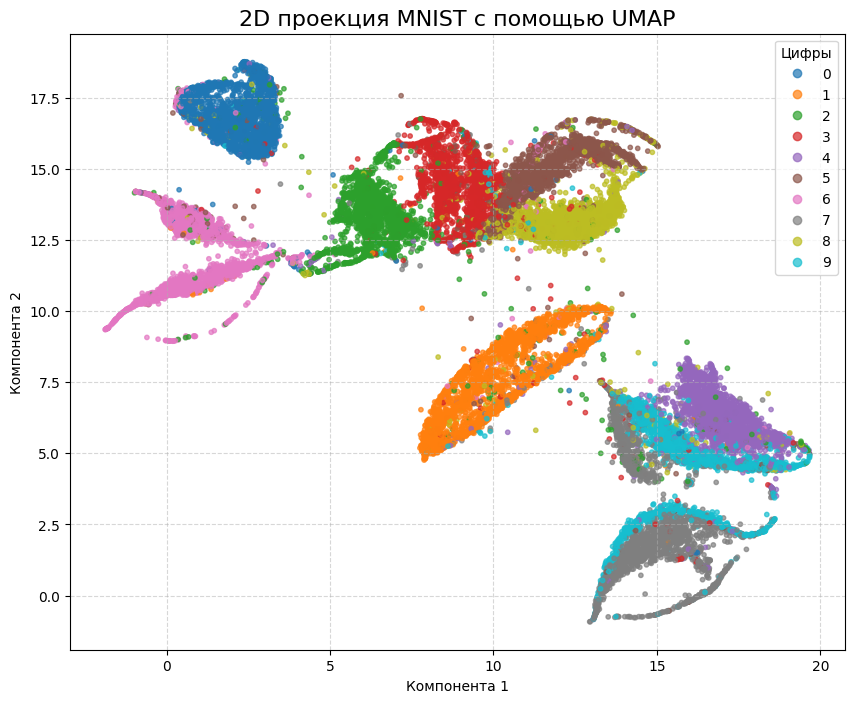

Метрика качества разделения для 'UMAP' (k-NN Accuracy):
  Точность на Train: 0.9149
  Точность на Test:  0.8967



train_accuracy  test_accuracy
UMAP                  0.914857       0.896714
PCA                   0.453408       0.334000
SVD                   0.453347       0.333905
Randomized-SVD        0.453347       0.333905
TSNE                  0.938306       0.095143

: 

In [ ]:
compare_dimensionality_reduction(X,y, ['PCA', 'SVD', 'Randomized-SVD', 'TSNE', 'UMAP'])

In [8]:
n_samples_total = X.shape[0]
n_samples_for_lle = 10000
random_indices = np.random.choice(n_samples_total, n_samples_for_lle, replace=False)
X_subset = X[random_indices]
y_subset = y[random_indices]

--- Обработка метода: LLE ---


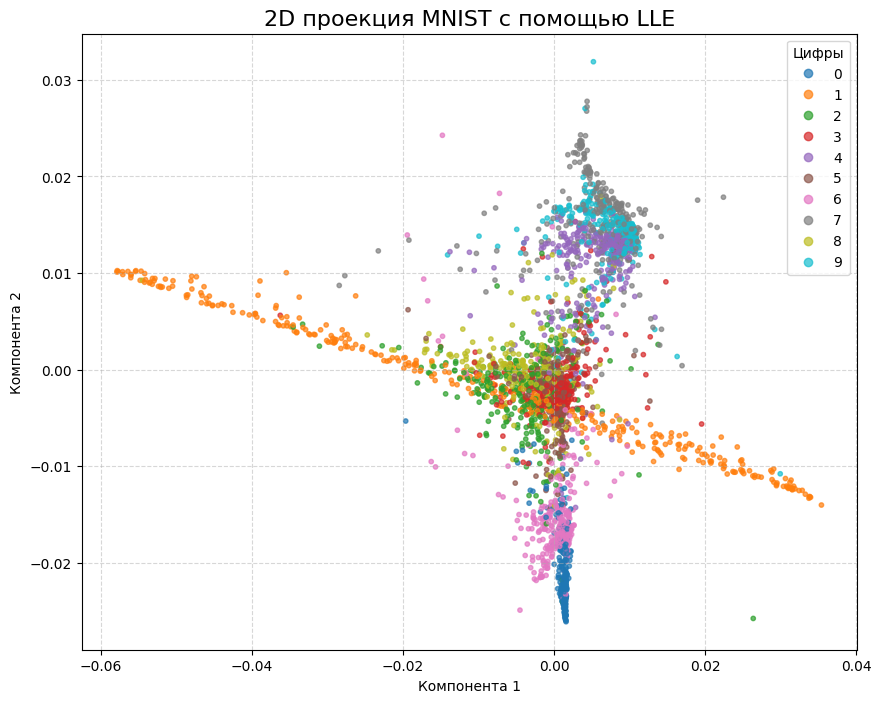

Метрика качества разделения для 'LLE' (k-NN Accuracy):
  Точность на Train: 0.6833
  Точность на Test:  0.5977



train_accuracy  test_accuracy
LLE        0.683286       0.597667

In [9]:
compare_dimensionality_reduction(X_subset,y_subset, ['LLE'])

## Сохранение и загрузка лучшей модели

In [27]:
umap_reducer_trained = UMAP(n_components=2, random_state=42, n_jobs=1)
umap_reducer_trained.fit(X)

UMAP(n_jobs=1, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [30]:
number_vec = load_grayscale_image("data/images/number.jpg")

In [31]:
number_vec

array([[113., 115., 115., ..., 113., 114., 114.],
       [114., 115., 115., ..., 112., 113., 113.],
       [114., 115., 115., ..., 111., 112., 112.],
       ...,
       [157., 154., 149., ..., 147., 146., 143.],
       [150., 149., 146., ..., 145., 146., 146.],
       [142., 143., 144., ..., 142., 145., 148.]], shape=(1280, 720))

In [33]:
umap_reducer_trained.transform(number_vec)

array([[5.188425 , 4.9300733],
       [5.1894894, 4.935377 ],
       [5.191994 , 4.9378195],
       ...,
       [4.3488407, 5.7054663],
       [4.387703 , 5.690523 ],
       [      nan,       nan]], shape=(1280, 2), dtype=float32)

In [28]:
joblib.dump(umap_reducer_trained, "model/umap_mnist")

['model/umap_mnist']

In [29]:
model = joblib.load("model/umap_mnist")

In [32]:
model.transform(number_vec)

array([[5.188425 , 4.9300733],
       [5.1894894, 4.935377 ],
       [5.191994 , 4.9378195],
       ...,
       [4.3488407, 5.7054663],
       [4.387703 , 5.690523 ],
       [      nan,       nan]], shape=(1280, 2), dtype=float32)

# Image compression using SVD

In [16]:
image_paths = ["photo_2025-11-10_13-27-48.jpg", "photo_2025-11-10_13-28-02.jpg", "photo_2025-11-10_13-28-12.jpg"]
if os.path.exists('data/images'):
    image_paths = [os.path.join('data/images', f) for f in os.listdir('data/images') if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

In [18]:
ranks_to_try = [1, 2, 5, 10, 15, 20, 50, 100, 150, 200]

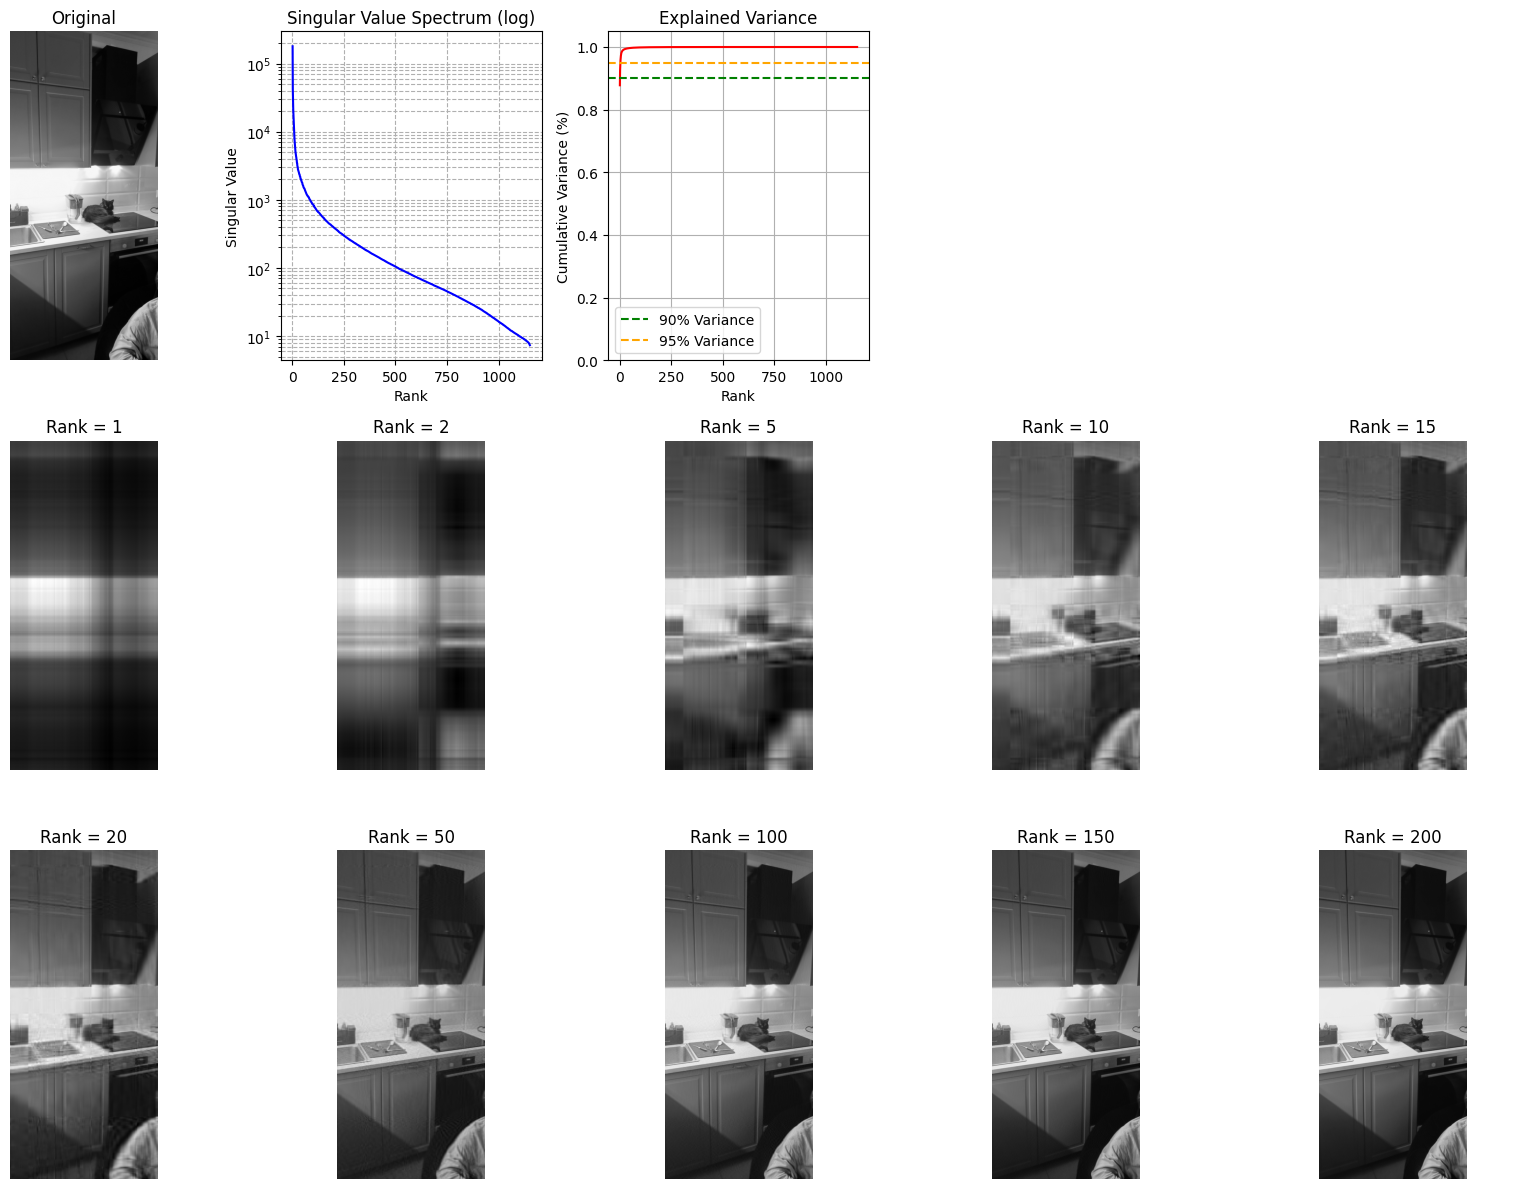

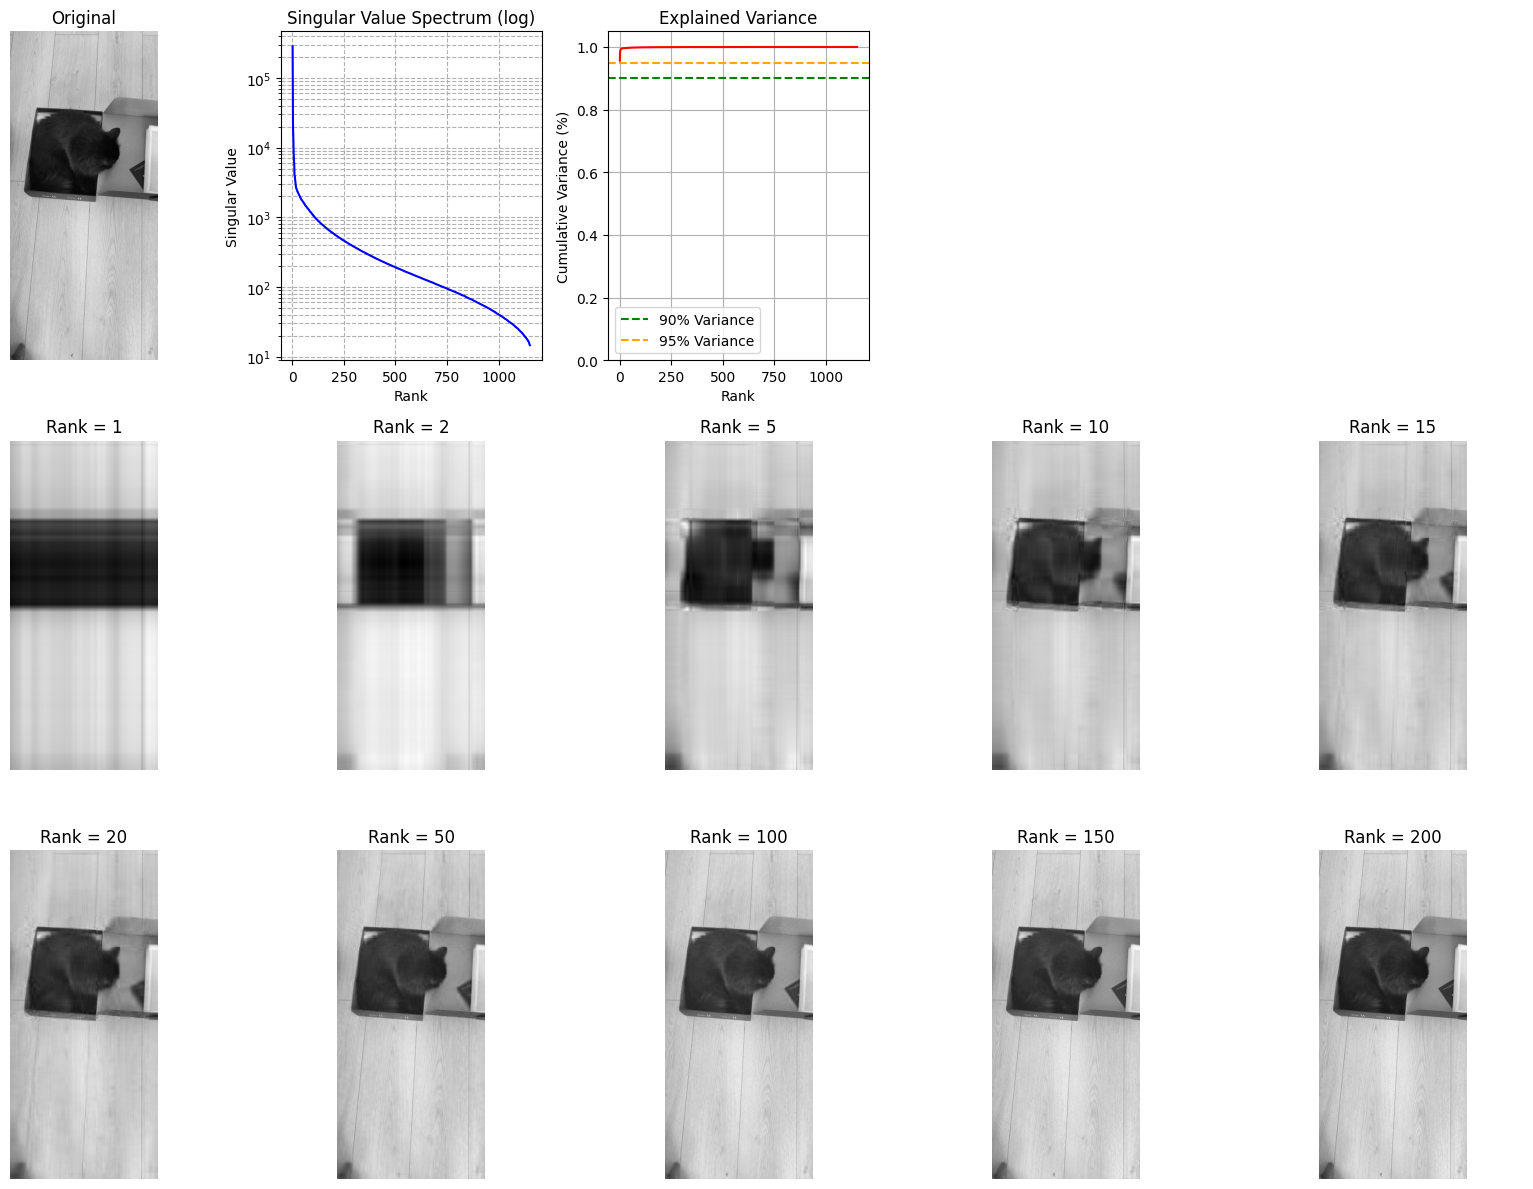

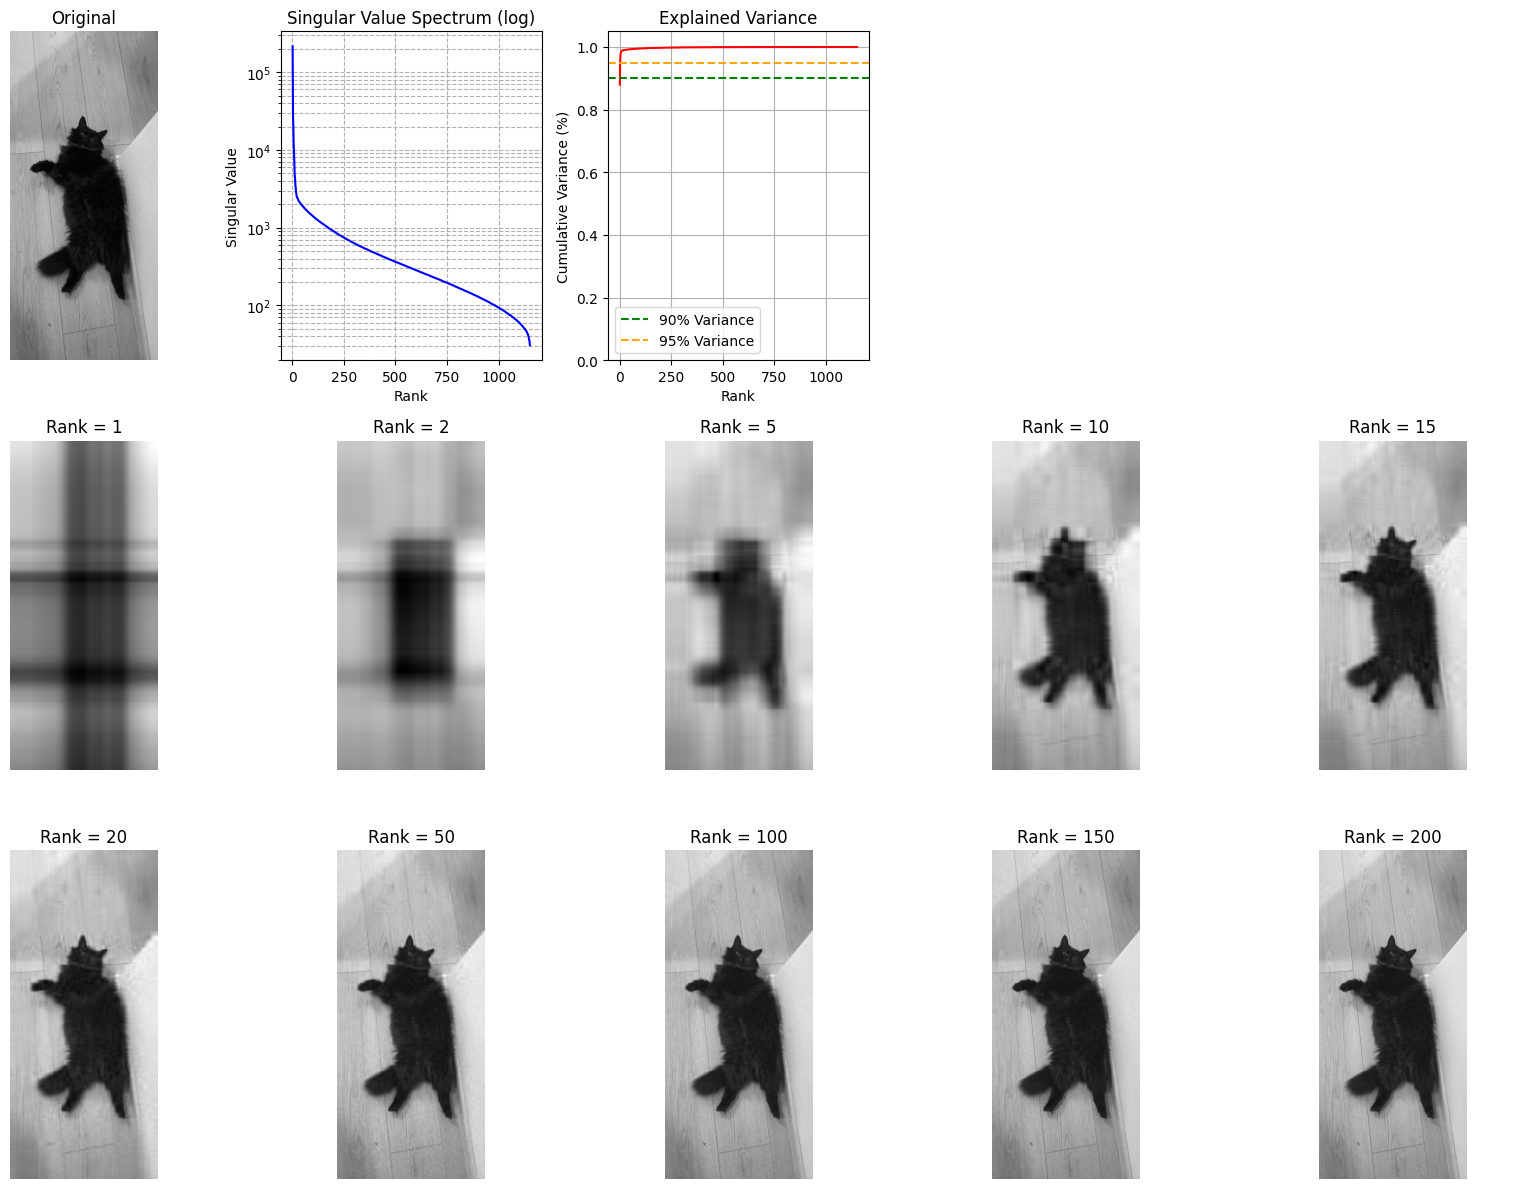

In [22]:
for path_or_matrix in image_paths:
    img_matrix = load_grayscale_image(path_or_matrix)
    U, s, Vt = decompose_svd(img_matrix)
    plot_svd_analysis(img_matrix, U, s, Vt, ranks_to_try)

**Для каждого из рассмотренных изображений для получения хорошей реконструкции достаточно на более 50 рангов**

**Объясненная дисперсия - это процент от общего разнообразия данных, который способна "объяснить" или "захватить" каждая компонента**